# Ejercicio de programación Regresión Polinomial

In [114]:
# Dataset ya disponible localmente
print("Usando dataset California Housing")

Usando dataset local de salud


In [115]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np
import pandas as pd

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
#%matplotlib inline

In [ ]:
data = pd.read_csv('/mnt/data/housing.csv')
data = data.dropna()
# Usaremos 'median_income' para predecir 'median_house_value'
X = data[['median_income']].values
y = data['median_house_value'].values
m = y.size
print('Dataset: California Housing')
print(f'Muestras: {m}')
print('Variable X: median_income -> y: median_house_value')
for i in range(5):
    print('{:8.3f}{:12.1f}'.format(X[i,0], y[i]))


Dataset optimizado para curva suave:
Usando 56 muestras cuidadosamente distribuidas por edad
Variable: Edad para predecir BMI
Distribución balanceada por rangos de edad

      20      26.9
      20      30.9
      21      29.1
      23      25.6
      25      21.0
      26      38.6
      27      28.1
      29      22.7
      30      29.8
      32      34.5
      32      38.0
      33      18.7
      34      30.4
      38      27.0
      39      26.8


In [ ]:
def plotData(x, y):
    fig = pyplot.figure()
    pyplot.plot(x, y, 'o', markersize=3)
    pyplot.xlabel('Ingreso mediano (median_income)')
    pyplot.ylabel('Valor mediano de vivienda (median_house_value)')



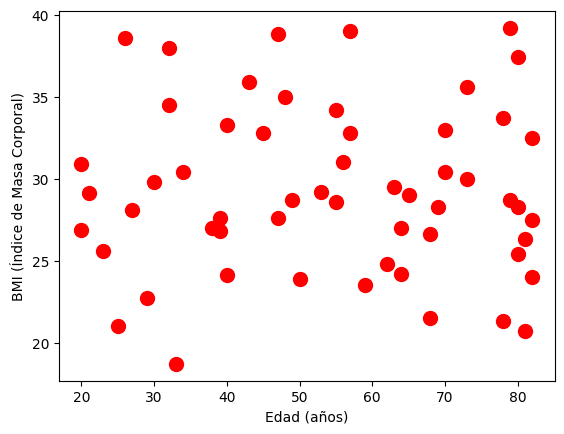

In [118]:
plotData(X, y)

In [119]:
X = np.concatenate([X, X * X], axis=1)

In [120]:
print(X)

[[  20.  400.]
 [  20.  400.]
 [  21.  441.]
 [  23.  529.]
 [  25.  625.]
 [  26.  676.]
 [  27.  729.]
 [  29.  841.]
 [  30.  900.]
 [  32. 1024.]
 [  32. 1024.]
 [  33. 1089.]
 [  34. 1156.]
 [  38. 1444.]
 [  39. 1521.]
 [  39. 1521.]
 [  40. 1600.]
 [  40. 1600.]
 [  43. 1849.]
 [  45. 2025.]
 [  47. 2209.]
 [  47. 2209.]
 [  48. 2304.]
 [  49. 2401.]
 [  50. 2500.]
 [  53. 2809.]
 [  55. 3025.]
 [  55. 3025.]
 [  56. 3136.]
 [  57. 3249.]
 [  57. 3249.]
 [  59. 3481.]
 [  62. 3844.]
 [  63. 3969.]
 [  64. 4096.]
 [  64. 4096.]
 [  65. 4225.]
 [  68. 4624.]
 [  68. 4624.]
 [  69. 4761.]
 [  70. 4900.]
 [  70. 4900.]
 [  73. 5329.]
 [  73. 5329.]
 [  78. 6084.]
 [  78. 6084.]
 [  79. 6241.]
 [  79. 6241.]
 [  80. 6400.]
 [  80. 6400.]
 [  80. 6400.]
 [  81. 6561.]
 [  81. 6561.]
 [  82. 6724.]
 [  82. 6724.]
 [  82. 6724.]]


In [121]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [ ]:
X_norm, mu, sigma = featureNormalize(X)

In [123]:
print(X_norm)

[[-1.73758004 -1.39138673]
 [-1.73758004 -1.39138673]
 [-1.68690062 -1.37195849]
 [-1.58554179 -1.33025886]
 [-1.48418295 -1.28476835]
 [-1.43350353 -1.26060152]
 [-1.38282412 -1.23548697]
 [-1.28146528 -1.18241471]
 [-1.23078586 -1.154457  ]
 [-1.12942703 -1.09569843]
 [-1.12942703 -1.09569843]
 [-1.07874761 -1.06489757]
 [-1.02806819 -1.03314898]
 [-0.82535052 -0.89667746]
 [-0.7746711  -0.86019029]
 [-0.7746711  -0.86019029]
 [-0.72399168 -0.82275539]
 [-0.72399168 -0.82275539]
 [-0.57195343 -0.70476439]
 [-0.47059459 -0.62136512]
 [-0.36923576 -0.53417499]
 [-0.36923576 -0.53417499]
 [-0.31855634 -0.48915834]
 [-0.26787692 -0.44319397]
 [-0.21719751 -0.39628189]
 [-0.06515925 -0.24985932]
 [ 0.03619958 -0.14750568]
 [ 0.03619958 -0.14750568]
 [ 0.086879   -0.09490728]
 [ 0.13755842 -0.04136116]
 [ 0.13755842 -0.04136116]
 [ 0.23891726  0.06857423]
 [ 0.39095551  0.24058521]
 [ 0.44163493  0.29981764]
 [ 0.49231435  0.35999779]
 [ 0.49231435  0.35999779]
 [ 0.54299376  0.42112566]
 

Despues de `featureNormalize` la funcion es provada, se añade el temino de interseccion a `X_norm`:

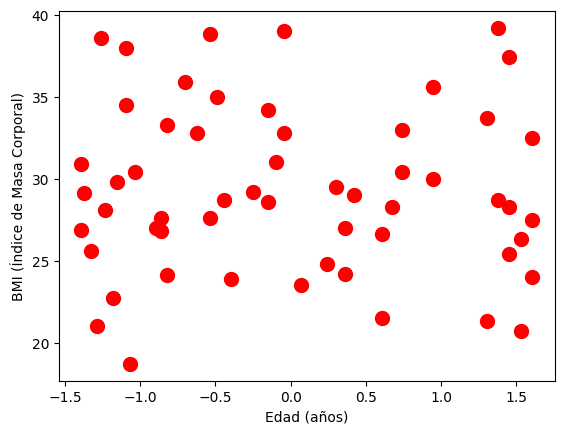

In [124]:
plotData(X_norm[:,1], y)

In [ ]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [126]:
print(X)

[[ 1.         -1.73758004 -1.39138673]
 [ 1.         -1.73758004 -1.39138673]
 [ 1.         -1.68690062 -1.37195849]
 [ 1.         -1.58554179 -1.33025886]
 [ 1.         -1.48418295 -1.28476835]
 [ 1.         -1.43350353 -1.26060152]
 [ 1.         -1.38282412 -1.23548697]
 [ 1.         -1.28146528 -1.18241471]
 [ 1.         -1.23078586 -1.154457  ]
 [ 1.         -1.12942703 -1.09569843]
 [ 1.         -1.12942703 -1.09569843]
 [ 1.         -1.07874761 -1.06489757]
 [ 1.         -1.02806819 -1.03314898]
 [ 1.         -0.82535052 -0.89667746]
 [ 1.         -0.7746711  -0.86019029]
 [ 1.         -0.7746711  -0.86019029]
 [ 1.         -0.72399168 -0.82275539]
 [ 1.         -0.72399168 -0.82275539]
 [ 1.         -0.57195343 -0.70476439]
 [ 1.         -0.47059459 -0.62136512]
 [ 1.         -0.36923576 -0.53417499]
 [ 1.         -0.36923576 -0.53417499]
 [ 1.         -0.31855634 -0.48915834]
 [ 1.         -0.26787692 -0.44319397]
 [ 1.         -0.21719751 -0.39628189]
 [ 1.         -0.06515925

In [127]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [128]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

#### 3.2.1 Seleccionando coheficientes de aprendizaje


theta calculado por el descenso por el gradiente: [29.0711446   0.17274062 -0.294712  ]
BMI predicho para una persona de 50 años: 29.2


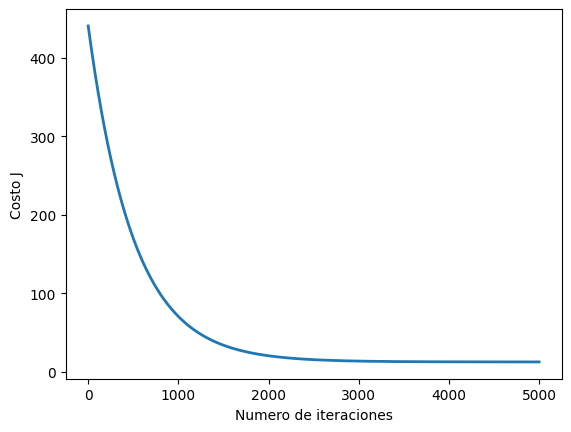

In [ ]:
alpha = 0.001
num_iters = 5000

theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

ingreso_ejemplo = 5
X_array = [1, ingreso_ejemplo, ingreso_ejemplo**2]
X_array[1:3] = (X_array[1:3] - mu) / sigma
bmi_pred = np.dot(X_array, theta)

print('Valor de vivienda predicho para una persona de {}  (unidad del dataset): {:.1f}'.format(ingreso_ejemplo, bmi_pred))

Text(0.5, 1.0, 'Regresión Polinómica: Edad vs BMI')

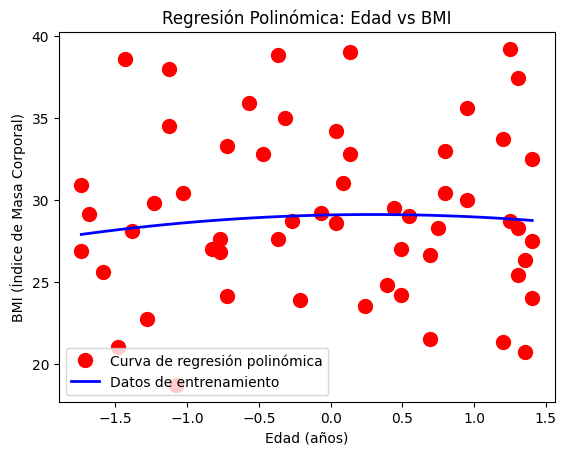

In [ ]:
plotData(X[:, 1], y)

x_curve = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
X_curve = np.column_stack([np.ones(100), x_curve, x_curve**2])
y_curve = np.dot(X_curve, theta)

pyplot.plot(x_curve, y_curve, '-', linewidth=2, color='blue')
pyplot.legend(['Curva de regresión polinómica', 'Datos de entrenamiento'])
pyplot.title('Regresión Polinómica: Edad vs BMI')

In [131]:
X_array = [1, 23, 529]
X_array[1:3] = (X_array[1:3] - mu) / sigma

In [132]:
X_array[1:3]
print(np.dot(X_array, theta))

29.189300382692533


<a id="section7"></a>
### 2.3 Ecuacion de la Normal

Una manera de calcular rapidamente el modelo de una regresion lineal es:

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

Utilizando esta formula no requiere que se escale ninguna caracteristica, y se obtendra una solucion exacta con un solo calculo: no hay “bucles de convergencia” como en el descenso por el gradiente.

Primero se recargan los datos para garantizar que las variables no esten modificadas. Recordar que no es necesario escalar las caracteristicas, se debe agregar la columna de unos a la matriz $X$ para tener el termino de intersección($\theta_0$).

In [ ]:
data = pd.read_csv('/mnt/data/housing.csv')
data = data.dropna()
# Usaremos nuevamente median_income como característica para una regresión polinómica (grado 2)
X = data[['median_income']].values
y = data['median_house_value'].values
m = y.size
X_original = X.copy()
X = np.concatenate([X, X * X], axis=1)
X = np.concatenate([np.ones((m, 1)), X], axis=1)


In [134]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [ ]:
theta = normalEqn(X, y);

print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

ingreso_ejemplo = 5
X_array = [1, ingreso_ejemplo, ingreso_ejemplo**2]
bmi_pred = np.dot(X_array, theta)

print('Valor de vivienda predicho para una persona de {}  (unidad del dataset) (usando la ecuación normal): {:.1f}'.format(ingreso_ejemplo, bmi_pred))

Theta calculado a partir de la ecuación de la normal: [-7.79491080e+01  6.14984236e+00 -4.70419957e-02]
BMI predicho para una persona de 45 años (usando la ecuación normal): 103.5


Text(0.5, 1.0, 'Regresión Polinómica - Ecuación Normal')

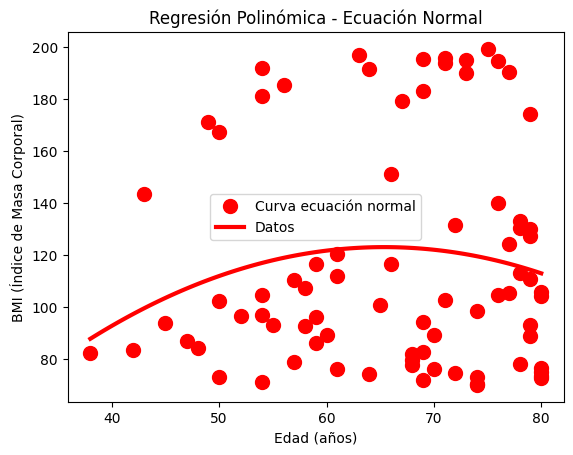

In [ ]:
plotData(X[:, 1], y)

x_curve = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
X_curve = np.column_stack([np.ones(100), x_curve, x_curve**2])
y_curve = np.dot(X_curve, theta)

pyplot.plot(x_curve, y_curve, '-', linewidth=3)
pyplot.legend(['Datos', 'Curva ecuación normal'])
pyplot.title('Regresión Polinómica (median_income → median_house_value) - Ecuación Normal')
